<a href="https://colab.research.google.com/github/MauricioTellezNava/viropolitica_poblacionCDMX/blob/main/maquetando_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando datos del dataframe X
### Este dataframe ya contiene los clusters de viropoder para la población de la CDMX, 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
X = pd.read_csv("/content/drive/MyDrive/Análisis del COVID-19 para la Ciudad de México/población/X.csv")
X = X.drop(columns=["Unnamed: 0"])
print(X.shape)
X.head()

(1743568, 92)


,inst_1,inst_2,inst_3,inst_4,inst_5,inst_6,inst_7,inst_8,inst_9,inst_10,...,tabaq_seIgn,otr_caso_si,otr_caso_no,otr_caso_seIgn,uci_si,uci_no,uci_noAplica,uci_noEsp,defunciones,cluster
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,3


# Análisis de los clusters

In [4]:
"""

Cluster 0 / delta: Es el grupo más vulnerable frente a la viropolítica. Incluye a la población que requirió mayores cuidados intensivos, ser intubada. Tuvo valores mayores de sistema inmunosuprimido, requirió mñas hospitalizaciones. 
Cluster 2 / gamma: Es el segundo grupo más vulnerable a la viropolítica.
Cluster 3 / beta: Es el segundo grupo más capaz de ejercer la viropolítica. Mantiene valores bajos para cada condición de riesgo.
Cluster 1 / alpha: Es el grupo más capaz de ejercer la viropolítica. Dados sus bajos valores para cada condición de riesgo, es el grupo menos vulnerable. 

"""

'\n\nCluster 0 / delta: Es el grupo más vulnerable frente a la viropolítica. Incluye a la población que requirió mayores cuidados intensivos, ser intubada. Tuvo valores mayores de sistema inmunosuprimido, requirió mñas hospitalizaciones. \nCluster 2 / gamma: Es el segundo grupo más vulnerable a la viropolítica.\nCluster 3 / beta: Es el segundo grupo más capaz de ejercer la viropolítica. Mantiene valorrs bajos para cada condición de riesgo.\nCluster 1 / alpha: Es el grupo más capaz de ejercer la viropolítica. Dados sus bajos valores para cada condición de riesgo, es el grupo menos vulnerable. \n\n'

# Creando la columna nombre_cluster con función condicional

In [6]:
condiciones = [
    (X["cluster"]== 1),
    (X["cluster"]== 3),
    (X["cluster"]== 2),
    (X["cluster"]== 0)
               ]
nombre = ["alpha", "beta", "gamma", "delta"]

In [9]:
X["nombre_cluster"] = np.select(condiciones, nombre)
X.head(10)

,inst_1,inst_2,inst_3,inst_4,inst_5,inst_6,inst_7,inst_8,inst_9,inst_10,...,otr_caso_si,otr_caso_no,otr_caso_seIgn,uci_si,uci_no,uci_noAplica,uci_noEsp,defunciones,cluster,nombre_cluster
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,delta
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,delta
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,2,gamma
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,3,beta
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,3,beta
5,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,3,beta
6,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,alpha
7,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,3,beta
8,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,3,beta
9,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,alpha


In [11]:
cdmx = pd.DataFrame(X["nombre_cluster"].value_counts())
cdmx

,nombre_cluster
beta,586749
gamma,505778
alpha,392414
delta,258627


# Tabla pivote

In [14]:
X_pivot = pd.pivot_table(X, index='cluster')
X_pivot["cluster"] = X_pivot.index
X_pivot[["EDAD", "defunciones", "uci_si", "intub_si", "asma_si", "diabetes_si", "inmusupr_si","indigena_si", "paciente_hosp", "obesidad_si", "renalCr_si"]]

,EDAD,defunciones,uci_si,intub_si,asma_si,diabetes_si,inmusupr_si,indigena_si,paciente_hosp,obesidad_si,renalCr_si
cluster,,,,,,,,,,,
0,68.055744,0.111794,0.012087,0.031706,0.013463,0.234102,0.011627,0.003797,0.189621,0.093536,0.018950
1,17.515665,0.000742,0.000650,0.000558,0.021256,0.004172,0.002110,0.002237,0.010769,0.032364,0.001514
2,49.491581,0.022917,0.003828,0.009299,0.017320,0.107954,0.006374,0.003278,0.058201,0.104902,0.006880
3,33.194011,0.004632,0.001275,0.002221,0.019908,0.020608,0.003083,0.002822,0.021375,0.078701,0.003201


In [15]:
X_pivot.columns

Index(['EDAD', 'alc_alv', 'alc_azcap', 'alc_beniJ', 'alc_coyo', 'alc_cuaj',
       'alc_cuauh', 'alc_gam', 'alc_iztac', 'alc_iztap', 'alc_magdC',
       'alc_migH', 'alc_milpa', 'alc_noEsp', 'alc_tlah', 'alc_tlalp',
       'alc_xoch', 'asma_no', 'asma_seIgn', 'asma_si', 'cardio_no',
       'cardio_seIgn', 'cardio_si', 'defunciones', 'diabetes_no',
       'diabetes_seIgn', 'diabetes_si', 'embarazo_no', 'embarazo_noAplica',
       'embarazo_seIgn', 'embarazo_si', 'epoc_no', 'epoc_seIgn', 'epoc_si',
       'hipert_no', 'hipert_seIgn', 'hipert_si', 'indigena_no',
       'indigena_noEsp', 'indigena_si', 'inmusupr_no', 'inmusupr_seIgn',
       'inmusupr_si', 'inst_1', 'inst_10', 'inst_11', 'inst_12', 'inst_13',
       'inst_14', 'inst_2', 'inst_3', 'inst_4', 'inst_5', 'inst_6', 'inst_7',
       'inst_8', 'inst_9', 'intub_no', 'intub_noAplica', 'intub_noEsp',
       'intub_si', 'leng_ind_no', 'leng_ind_noEsp', 'leng_ind_si',
       'neumonia_no', 'neumonia_noEsp', 'neumonia_si', 'obesidad_no'

# Dataframes para cada alcaldía

In [25]:
# Definiendo las relaciones entre condiciones2 y nombre2 a partir de la columna "cluster" de azcapotzalco

azcapotzalco = pd.DataFrame(X[X["alc_azcap"]==1]["cluster"].value_counts()).reset_index()
azcapotzalco = azcapotzalco.rename({"index":"cluster", "cluster":"poblacion"}, axis="columns")

condiciones2 = [
    (azcapotzalco["cluster"]== 1),
    (azcapotzalco["cluster"]== 3),
    (azcapotzalco["cluster"]== 2),
    (azcapotzalco["cluster"]== 0)
               ]
nombre2 = ["alpha", "beta", "gamma", "delta"]

In [26]:
azcapotzalco["nombre"] = np.select(condiciones2, nombre2)

alvaroOb = pd.DataFrame(X[X["alc_alv"]==1]["cluster"].value_counts()).reset_index()
alvaroOb = alvaroOb.rename({"index":"cluster", "cluster":"poblacion"}, axis="columns")
alvaroOb["nombre"] = np.select(condiciones2, nombre2)

benitoJ = pd.DataFrame(X[X["alc_beniJ"]==1]["cluster"].value_counts()).reset_index()
benitoJ = benitoJ.rename({"index":"cluster", "cluster":"poblacion"}, axis="columns")
benitoJ["nombre"] = np.select(condiciones2, nombre2)

coyoacan = pd.DataFrame(X[X["alc_coyo"]==1]["cluster"].value_counts()).reset_index()
coyoacan = coyoacan.rename({"index":"cluster", "cluster":"poblacion"}, axis="columns")
coyoacan["nombre"] = np.select(condiciones2, nombre2)

cuajimalpa = pd.DataFrame(X[X["alc_cuaj"]==1]["cluster"].value_counts()).reset_index()
cuajimalpa = cuajimalpa.rename({"index":"cluster", "cluster":"poblacion"}, axis="columns")
cuajimalpa["nombre"] = np.select(condiciones2, nombre2)

cuauhtemoc = pd.DataFrame(X[X["alc_cuauh"]==1]["cluster"].value_counts()).reset_index()
cuauhtemoc = cuauhtemoc.rename({"index":"cluster", "cluster":"poblacion"}, axis="columns")
cuauhtemoc["nombre"] = np.select(condiciones2, nombre2)

gam = pd.DataFrame(X[X["alc_gam"]==1]["cluster"].value_counts()).reset_index()
gam = gam.rename({"index":"cluster", "cluster":"poblacion"}, axis="columns")
gam["nombre"] = np.select(condiciones2, nombre2)

iztacalco = pd.DataFrame(X[X["alc_iztac"]==1]["cluster"].value_counts()).reset_index()
iztacalco = iztacalco.rename({"index":"cluster", "cluster":"poblacion"}, axis="columns")
iztacalco["nombre"] = np.select(condiciones2, nombre2)

iztapalapa = pd.DataFrame(X[X["alc_iztap"]==1]["cluster"].value_counts()).reset_index()
iztapalapa = iztapalapa.rename({"index":"cluster", "cluster":"poblacion"}, axis="columns")
iztapalapa["nombre"] = np.select(condiciones2, nombre2)

magdalenaC = pd.DataFrame(X[X["alc_magdC"]==1]["cluster"].value_counts()).reset_index()
magdalenaC = magdalenaC.rename({"index":"cluster", "cluster":"poblacion"}, axis="columns")
magdalenaC["nombre"] = np.select(condiciones2, nombre2)

miguelH = pd.DataFrame(X[X["alc_migH"]==1]["cluster"].value_counts()).reset_index()
miguelH = miguelH.rename({"index":"cluster", "cluster":"poblacion"}, axis="columns")
miguelH["nombre"] = np.select(condiciones2, nombre2)

milpaA = pd.DataFrame(X[X["alc_milpa"]==1]["cluster"].value_counts()).reset_index()
milpaA = milpaA.rename({"index":"cluster", "cluster":"poblacion"}, axis="columns")
milpaA["nombre"] = np.select(condiciones2, nombre2)

noEspecificado = pd.DataFrame(X[X["alc_noEsp"]==1]["cluster"].value_counts()).reset_index()
noEspecificado = noEspecificado.rename({"index":"cluster", "cluster":"poblacion"}, axis="columns")
noEspecificado["nombre"] = np.select(condiciones2, nombre2)

tlahuac = pd.DataFrame(X[X["alc_tlah"]==1]["cluster"].value_counts()).reset_index()
tlahuac = tlahuac.rename({"index":"cluster", "cluster":"poblacion"}, axis="columns")
tlahuac["nombre"] = np.select(condiciones2, nombre2)

tlalpan = pd.DataFrame(X[X["alc_tlalp"]==1]["cluster"].value_counts()).reset_index()
tlalpan = tlalpan.rename({"index":"cluster", "cluster":"poblacion"}, axis="columns")
tlalpan["nombre"] = np.select(condiciones2, nombre2)

venustianoC = pd.DataFrame(X[X["venusC"]==1]["cluster"].value_counts()).reset_index()
venustianoC = venustianoC.rename({"index":"cluster", "cluster":"poblacion"}, axis="columns")
venustianoC["nombre"] = np.select(condiciones2, nombre2)

xochimilco = pd.DataFrame(X[X["alc_xoch"]==1]["cluster"].value_counts()).reset_index()
xochimilco = xochimilco.rename({"index":"cluster", "cluster":"poblacion"}, axis="columns")
xochimilco["nombre"] = np.select(condiciones2, nombre2)

# Porcentaje de población por cluster, para cada alcaldía de la Ciudad de México

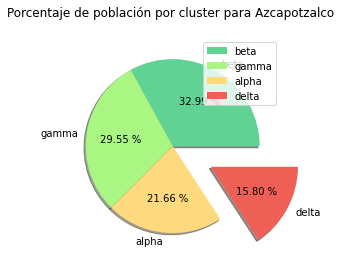

In [48]:
# Azcapotzalco


conteo = azcapotzalco["poblacion"]
etiquetas = azcapotzalco["nombre"].unique()
colores = ["#60D394", "#AAF683", "#FFD97D", "#EE6055", "#FF9B85"]
extraccion = 0,0,0,0.5

fig, ax = plt.subplots()
plt.pie(conteo, 
        labels= etiquetas,
        autopct = ("%0.2f %%"),
        colors = colores,
        explode = extraccion, 
        shadow=True)

ax.set_title("Porcentaje de población por cluster para Azcapotzalco \n")
ax.legend()
plt.show()


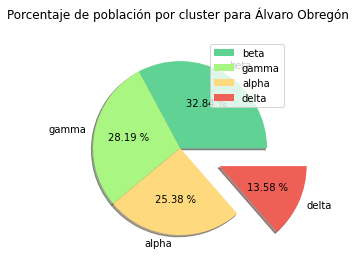

In [49]:
# Álvaro Obregón


conteo = alvaroOb["poblacion"]
etiquetas = alvaroOb["nombre"].unique()
colores = ["#60D394", "#AAF683", "#FFD97D", "#EE6055", "#FF9B85"]
extraccion = 0,0,0,0.5

fig, ax = plt.subplots()
plt.pie(conteo, 
        labels= etiquetas,
        autopct = ("%0.2f %%"),
        colors = colores,
        explode = extraccion, 
        shadow=True)

ax.set_title("Porcentaje de población por cluster para Álvaro Obregón \n")
ax.legend()
plt.show()


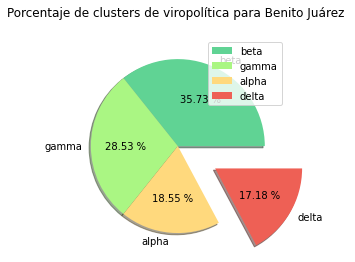

In [33]:
# Benito Juárez


conteo = benitoJ["poblacion"]
etiquetas = benitoJ["nombre"].unique()
colores = ["#60D394", "#AAF683", "#FFD97D", "#EE6055", "#FF9B85"]
extraccion = 0,0,0,0.5

fig, ax = plt.subplots()
plt.pie(conteo, 
        labels= etiquetas,
        autopct = ("%0.2f %%"),
        colors = colores,
        explode = extraccion, 
        shadow=True)

ax.set_title("Porcentaje de población por cluster para Benito Juárez \n")
ax.legend()
plt.show()

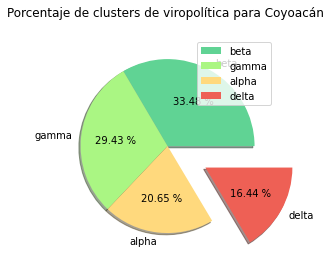

In [34]:
# Coyoacán

conteo = coyoacan["poblacion"]
etiquetas = coyoacan["nombre"].unique()
colores = ["#60D394", "#AAF683", "#FFD97D", "#EE6055", "#FF9B85"]
extraccion = 0,0,0,0.5

fig, ax = plt.subplots()
plt.pie(conteo, 
        labels= etiquetas,
        autopct = ("%0.2f %%"),
        colors = colores,
        explode = extraccion, 
        shadow=True)

ax.set_title("Porcentaje de población por cluster para Coyoacán \n")
ax.legend()
plt.show()

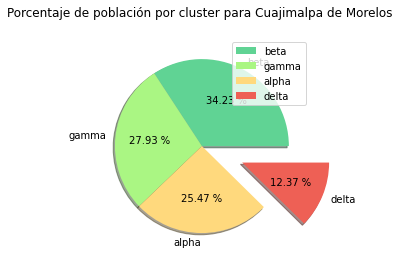

In [50]:
# Cuajimalpa

conteo = cuajimalpa["poblacion"]
etiquetas = cuajimalpa["nombre"].unique()
colores = ["#60D394", "#AAF683", "#FFD97D", "#EE6055", "#FF9B85"]
extraccion = 0,0,0,0.5

fig, ax = plt.subplots()
plt.pie(conteo, 
        labels= etiquetas,
        autopct = ("%0.2f %%"),
        colors = colores,
        explode = extraccion, 
        shadow=True)

ax.set_title("Porcentaje de población por cluster para Cuajimalpa de Morelos \n")
ax.legend()
plt.show()

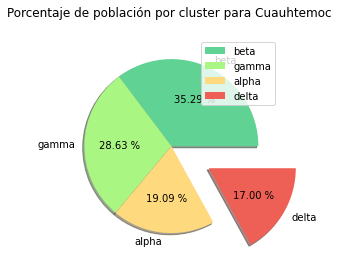

In [37]:
# Cuauhtemoc

conteo = cuauhtemoc["poblacion"]
etiquetas = cuauhtemoc["nombre"].unique()
colores = ["#60D394", "#AAF683", "#FFD97D", "#EE6055", "#FF9B85"]
extraccion = 0,0,0,0.5

fig, ax = plt.subplots()
plt.pie(conteo, 
        labels= etiquetas,
        autopct = ("%0.2f %%"),
        colors = colores,
        explode = extraccion, 
        shadow=True)

ax.set_title("Porcentaje de población por cluster para Cuauhtemoc \n")
ax.legend()
plt.show()

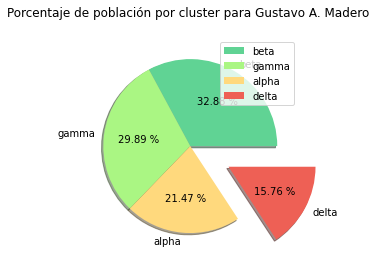

In [38]:
# Gustavo A. Madero

conteo = gam["poblacion"]
etiquetas = gam["nombre"].unique()
colores = ["#60D394", "#AAF683", "#FFD97D", "#EE6055", "#FF9B85"]
extraccion = 0,0,0,0.5

fig, ax = plt.subplots()
plt.pie(conteo, 
        labels= etiquetas,
        autopct = ("%0.2f %%"),
        colors = colores,
        explode = extraccion, 
        shadow=True)

ax.set_title("Porcentaje de población por cluster para Gustavo A. Madero \n")
ax.legend()
plt.show()

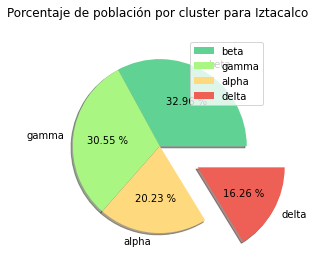

In [39]:
# Iztacalco

conteo = iztacalco["poblacion"]
etiquetas = iztacalco["nombre"].unique()
colores = ["#60D394", "#AAF683", "#FFD97D", "#EE6055", "#FF9B85"]
extraccion = 0,0,0,0.5

fig, ax = plt.subplots()
plt.pie(conteo, 
        labels= etiquetas,
        autopct = ("%0.2f %%"),
        colors = colores,
        explode = extraccion, 
        shadow=True)

ax.set_title("Porcentaje de población por cluster para Iztacalco \n")
ax.legend()
plt.show()

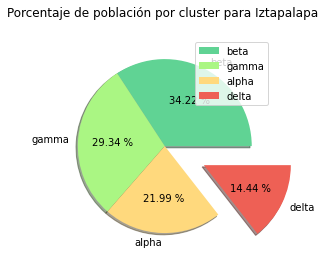

In [40]:
# Iztapalapa

conteo = iztapalapa["poblacion"]
etiquetas = iztapalapa["nombre"].unique()
colores = ["#60D394", "#AAF683", "#FFD97D", "#EE6055", "#FF9B85"]
extraccion = 0,0,0,0.5

fig, ax = plt.subplots()
plt.pie(conteo, 
        labels= etiquetas,
        autopct = ("%0.2f %%"),
        colors = colores,
        explode = extraccion, 
        shadow=True)

ax.set_title("Porcentaje de población por cluster para Iztapalapa \n")
ax.legend()
plt.show()

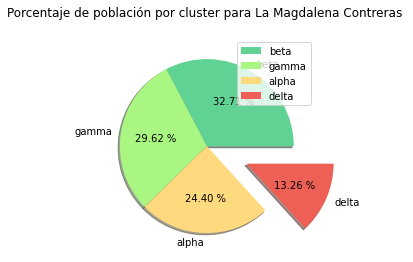

In [41]:
# La Magdalena Contreras
conteo = magdalenaC["poblacion"]
etiquetas = magdalenaC["nombre"].unique()
colores = ["#60D394", "#AAF683", "#FFD97D", "#EE6055", "#FF9B85"]
extraccion = 0,0,0,0.5

fig, ax = plt.subplots()
plt.pie(conteo, 
        labels= etiquetas,
        autopct = ("%0.2f %%"),
        colors = colores,
        explode = extraccion, 
        shadow=True)

ax.set_title("Porcentaje de población por cluster para La Magdalena Contreras \n")
ax.legend()
plt.show()

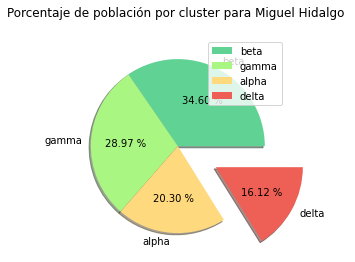

In [42]:
# Miguel Hidalgo
conteo = miguelH["poblacion"]
etiquetas = miguelH["nombre"].unique()
colores = ["#60D394", "#AAF683", "#FFD97D", "#EE6055", "#FF9B85"]
extraccion = 0,0,0,0.5

fig, ax = plt.subplots()
plt.pie(conteo, 
        labels= etiquetas,
        autopct = ("%0.2f %%"),
        colors = colores,
        explode = extraccion, 
        shadow=True)

ax.set_title("Porcentaje de población por cluster para Miguel Hidalgo \n")
ax.legend()
plt.show()

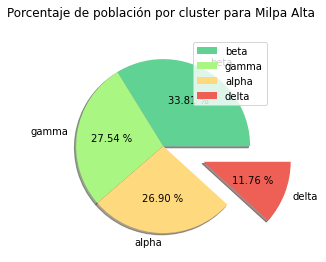

In [43]:
# Milpa Alta
conteo = milpaA["poblacion"]
etiquetas = milpaA["nombre"].unique()
colores = ["#60D394", "#AAF683", "#FFD97D", "#EE6055", "#FF9B85"]
extraccion = 0,0,0,0.5

fig, ax = plt.subplots()
plt.pie(conteo, 
        labels= etiquetas,
        autopct = ("%0.2f %%"),
        colors = colores,
        explode = extraccion, 
        shadow=True)

ax.set_title("Porcentaje de población por cluster para Milpa Alta \n")
ax.legend()
plt.show()

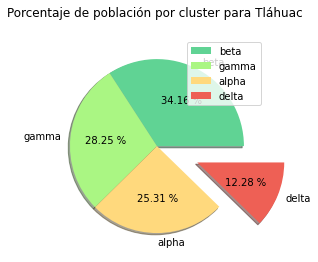

In [44]:
# Tláhuac
conteo = tlahuac["poblacion"]
etiquetas = tlahuac["nombre"].unique()
colores = ["#60D394", "#AAF683", "#FFD97D", "#EE6055", "#FF9B85"]
extraccion = 0,0,0,0.5

fig, ax = plt.subplots()
plt.pie(conteo, 
        labels= etiquetas,
        autopct = ("%0.2f %%"),
        colors = colores,
        explode = extraccion, 
        shadow=True)

ax.set_title("Porcentaje de población por cluster para Tláhuac \n")
ax.legend()
plt.show()

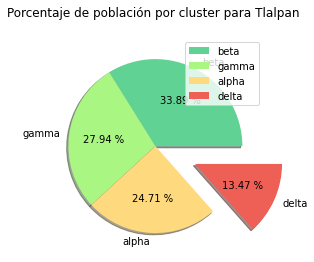

In [45]:
# Tlalpan
conteo = tlalpan["poblacion"]
etiquetas = tlalpan["nombre"].unique()
colores = ["#60D394", "#AAF683", "#FFD97D", "#EE6055", "#FF9B85"]
extraccion = 0,0,0,0.5

fig, ax = plt.subplots()
plt.pie(conteo, 
        labels= etiquetas,
        autopct = ("%0.2f %%"),
        colors = colores,
        explode = extraccion, 
        shadow=True)

ax.set_title("Porcentaje de población por cluster para Tlalpan \n")
ax.legend()
plt.show()

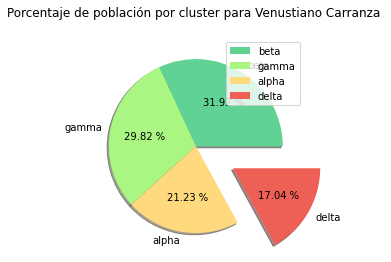

In [46]:
# Venustiano Carranza
conteo = venustianoC["poblacion"]
etiquetas = venustianoC["nombre"].unique()
colores = ["#60D394", "#AAF683", "#FFD97D", "#EE6055", "#FF9B85"]
extraccion = 0,0,0,0.5

fig, ax = plt.subplots()
plt.pie(conteo, 
        labels= etiquetas,
        autopct = ("%0.2f %%"),
        colors = colores,
        explode = extraccion, 
        shadow=True)

ax.set_title("Porcentaje de población por cluster para Venustiano Carranza \n")
ax.legend()
plt.show()

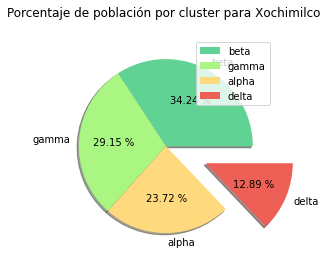

In [47]:
# Xochimilco
conteo = xochimilco["poblacion"]
etiquetas = xochimilco["nombre"].unique()
colores = ["#60D394", "#AAF683", "#FFD97D", "#EE6055", "#FF9B85"]
extraccion = 0,0,0,0.5

fig, ax = plt.subplots()
plt.pie(conteo, 
        labels= etiquetas,
        autopct = ("%0.2f %%"),
        colors = colores,
        explode = extraccion, 
        shadow=True)

ax.set_title("Porcentaje de población por cluster para Xochimilco \n")
ax.legend()
plt.show()